## Data Anlysis

In [ ]:
import pandas as pd
import numpy as np

## Read the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Placement_Data.csv')

### Show Dataset

In [ ]:
df.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


**Find Number of Features**

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**Find the number of records and columns**


In [ ]:
df.shape[0]

215

**Use the .info() method to find the number of Non Null entries and Data Type of each feature**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**What is the average Secondary Education percentage - 10th Grade**


In [ ]:
df['ssc_p'].mean()


67.30339534883721

**What is the Max Secondary Education percentage - 10th Grade**

In [ ]:
df['ssc_p'].max()

89.4

**How many toppers where there in 10th Grade?**


In [ ]:
df[df['ssc_p']==df['ssc_p'].max()]['ssc_p'].count()

1

**Is the student who got highest Secondary Eduaction percentage, placed or not?**


In [ ]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

**How many Students placed and not placed**

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

**What is the most common degree of the placed students**

In [ ]:
df[df['status']=='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

**How many unique degrees are there in dataset**

In [ ]:
df['degree_t'].nunique()

3

**Is there a correlation between 12 th and 10th percentage**

In [ ]:
df['hsc_p'].corr(df['ssc_p'])

0.5114721015997723

**Find Correlation matrix**

In [ ]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


# Data Preprocessing

**Identify the column which can be removed?(only 1)**


In [ ]:
df.drop(columns=['sl_no'],inplace=True)

**Check no of null values in each columns**

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Fill the missing values with appropriate values and check number of null values in each column again**


In [ ]:
df.fillna(0,inplace=True)

# Data Visualization

## Import Matplotlib and Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Draw scatter plot between 10th and 12 percentage**

Text(0.5, 0, '10th percentages')

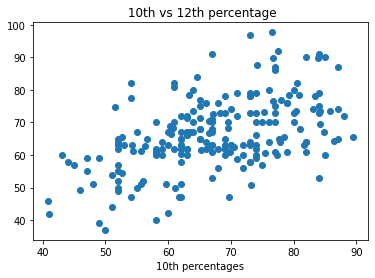

In [ ]:
plt.scatter(df["ssc_p"],df["hsc_p"])
plt.title(" 10th vs 12th percentage")
plt.xlabel("10th percentages")

**Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data**


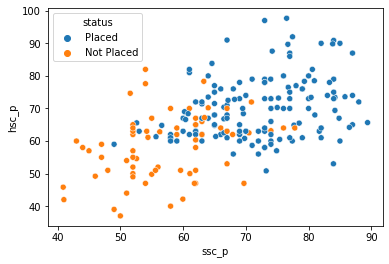

In [ ]:
sns.scatterplot(data = df,x= 'ssc_p', y = 'hsc_p', hue='status')

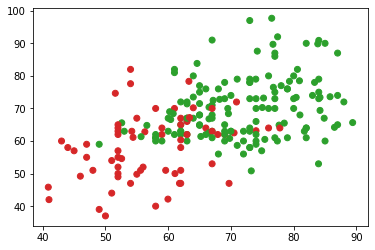

In [ ]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
plt.scatter(df["ssc_p"],df["hsc_p"],c=df['status'].map(colors))

**Draw the pairplots between all continuous columns**


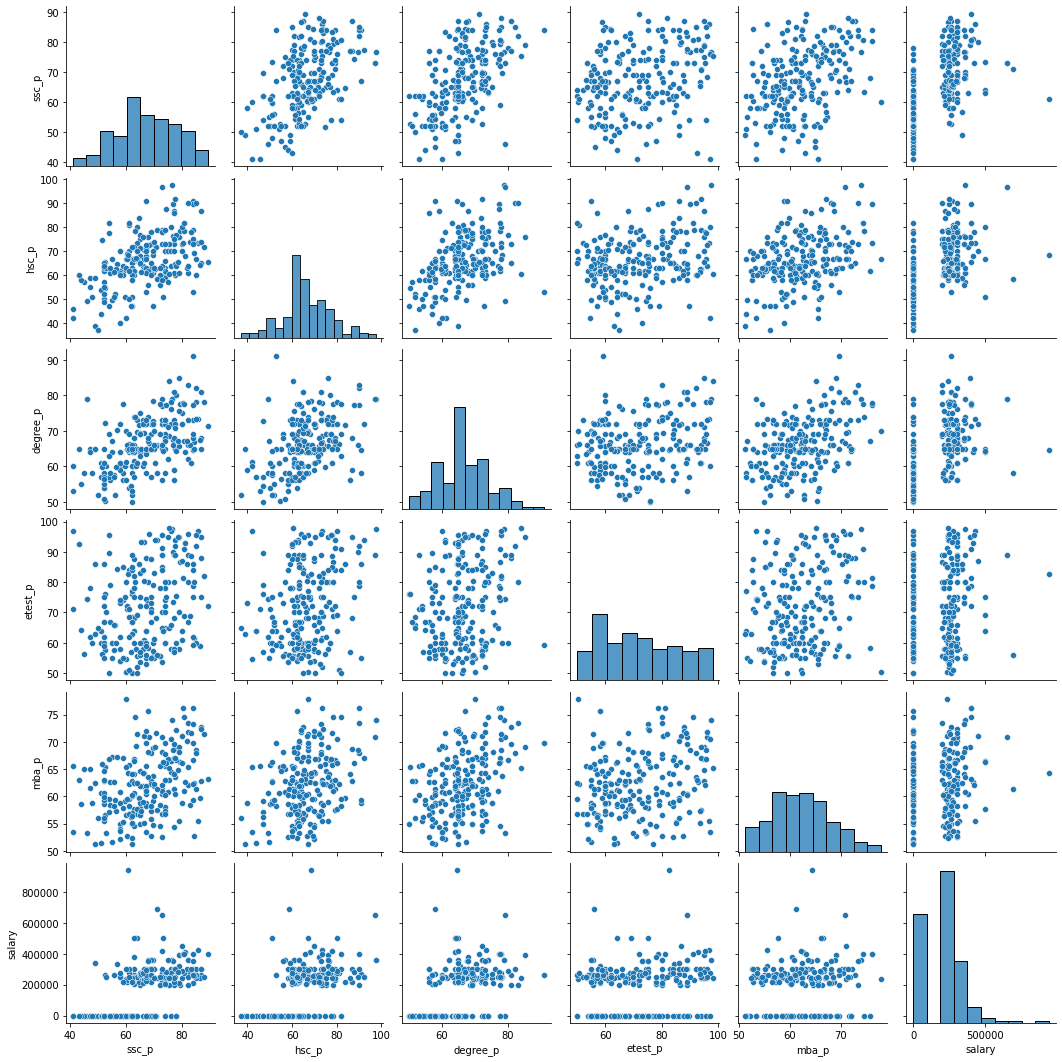

In [ ]:
sns.pairplot(df)

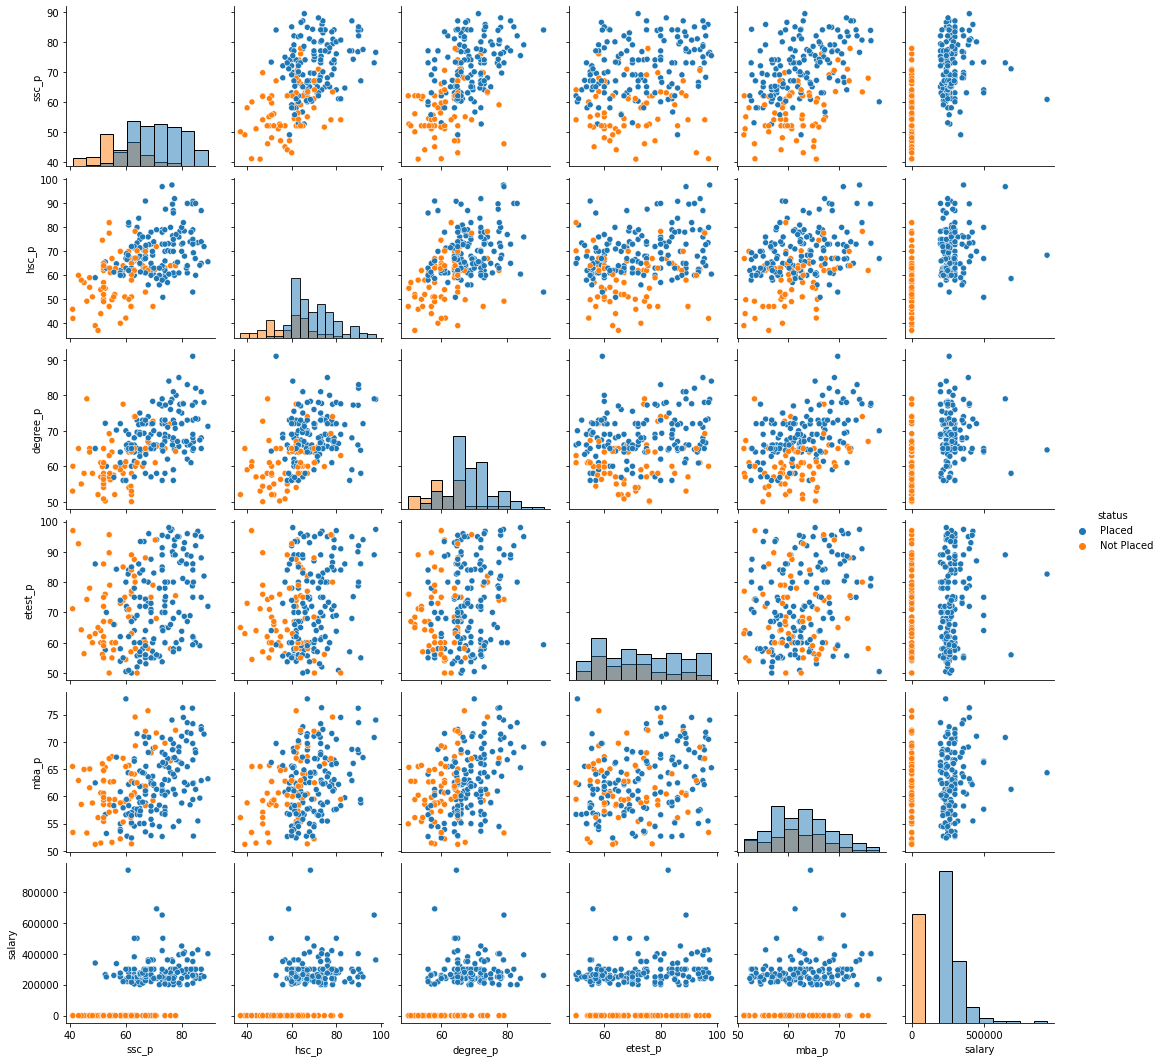

In [ ]:
sns.pairplot(df,hue='status',diag_kind='hist')

**Draw boxplot for 10th percentage**

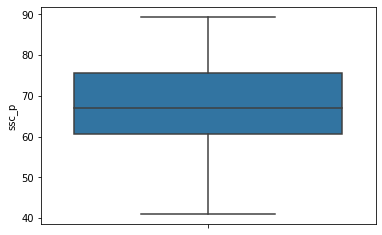

In [ ]:
sns.boxplot(y='ssc_p',data=df)

**Draw boxplot for 12th percentage**

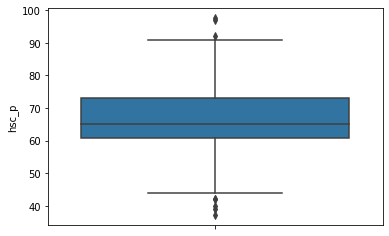

In [ ]:
sns.boxplot(y='hsc_p',data=df)

**Draw a boxplot for 12th percentage of the students for placed and unplaced students**

In [ ]:
placed = df[df['status']=='Placed']['hsc_p']
not_placed = df[df['status']=='Not Placed']['hsc_p']

In [ ]:
df1=pd.DataFrame({'12th_Placed':placed , '12th Not Placed':not_placed})

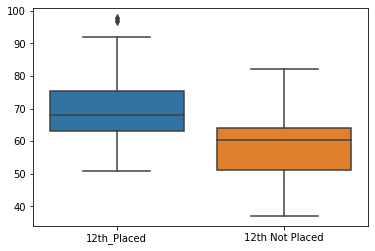

In [ ]:
sns.boxplot(data=df1)

### Method-2

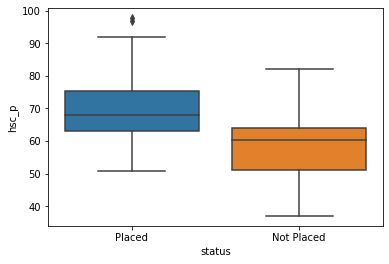

In [ ]:
sns.boxplot(y='hsc_p',data=df, x='status')

**Draw lineplot for 10th, 12th, degree and MBA percentage**

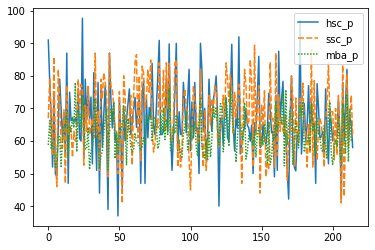

In [ ]:
sns.lineplot(data=df[['hsc_p','ssc_p','mba_p']])

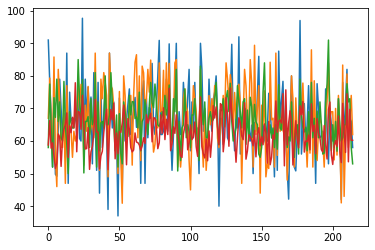

In [ ]:
plt.plot(df[['hsc_p','ssc_p','degree_p','mba_p']])


**Find correlation between continous columns**

In [ ]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


**Draw heatmap of correlation**

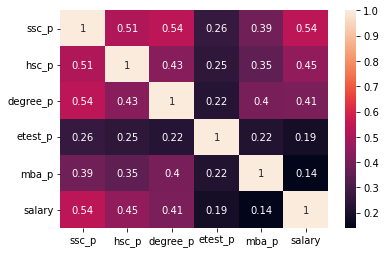

In [ ]:
sns.heatmap(data=df.corr(),annot=True)

**Draw histogram for salary of students**

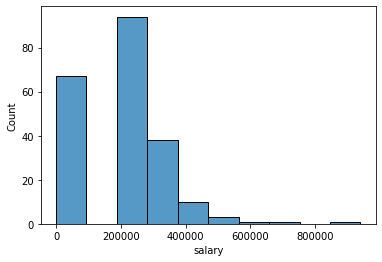

In [ ]:
sns.histplot(data=df['salary'])

**Draw the distribution of 10th Grade percentage**

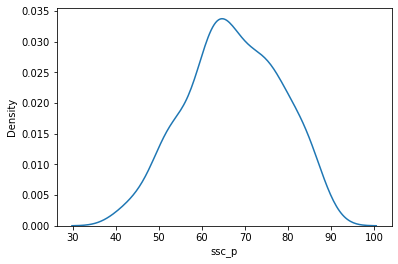

In [ ]:
sns.kdeplot(data=df['ssc_p'])

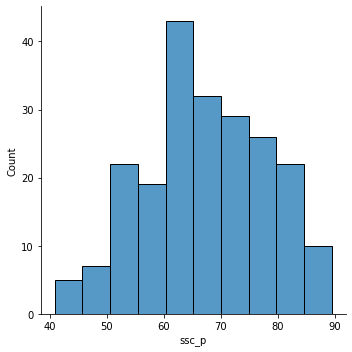

In [ ]:
sns.displot(data=df['ssc_p'])

# Outlier Analysis

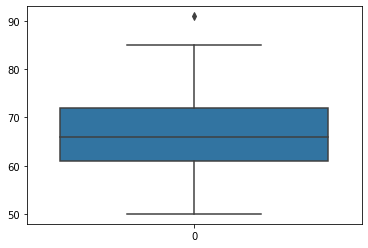

In [ ]:
sns.boxplot(data=df['degree_p'])

In [ ]:
perc25 = df['degree_p'].quantile(0.25)

In [ ]:
perc25

61.0

In [ ]:
perc75 = df['degree_p'].quantile(0.75)

In [ ]:
perc75

72.0

In [ ]:
iqr=perc75-perc25

In [ ]:
iqr

11.0

In [ ]:
upperlimit=perc75+(iqr*1.5)
lowerlimit=perc25-(iqr*1.5)

In [ ]:
df=df[(df['degree_p']<upperlimit) & (df['degree_p']>lowerlimit)]

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


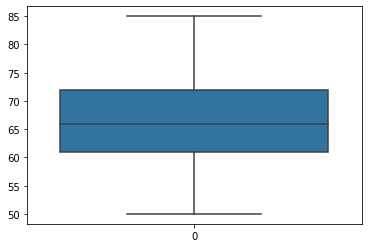

In [ ]:
sns.boxplot(data=df['degree_p'])

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

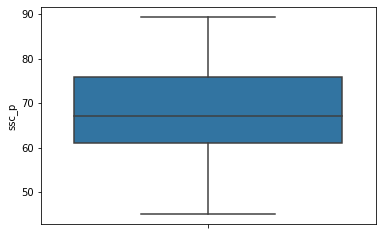

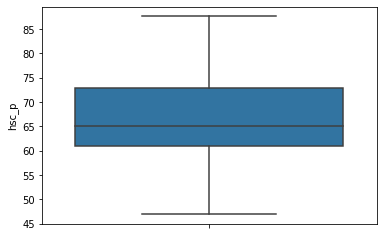

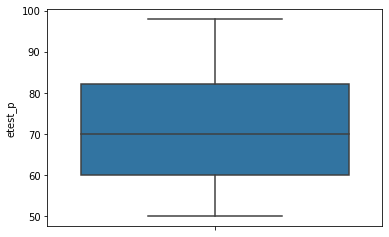

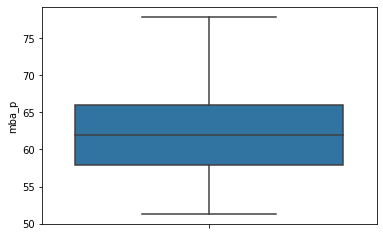

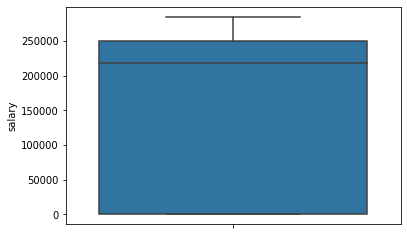

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
  perc25 = df[c].quantile(0.25)
  perc75 = df[c].quantile(0.75)
  upperlimit=perc75+(iqr*1.5)
  lowerlimit=perc25-(iqr*1.5)
  df=df[(df[c]<upperlimit) & (df[c]>lowerlimit)]
  plt.figure()
  sns.boxplot(y=c,data=df)

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

In [ ]:
df['ssc_b']

1      0
2      0
3      0
5      1
6      1
      ..
205    1
209    0
211    1
213    1
214    0
Name: ssc_b, Length: 147, dtype: int64

In [ ]:
col=['gender','hsc_b','hsc_s','degree_t','workex','specialisation','status']

In [ ]:
for c in col:
  df[c]=le.fit_transform(df[c])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0,0.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0,0.0
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,61.00,1,62.00,1,1,65.00,0,0,62.00,0,56.81,1,250000.0
209,1,62.00,0,72.00,0,1,65.00,0,0,67.00,0,56.49,1,216000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.00,0,53.62,1,275000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.00,1,60.23,1,204000.0


# Linear Regression

#### Extract dependant and independant variables

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
X = df.iloc[:,0:-1].values

In [ ]:
Y = df.iloc[:,-1].values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       [ 1.  , 56.  ,  0.  , ...,  1.  , 59.43,  0.  ],
       ...,
       [ 1.  , 58.  ,  1.  , ...,  0.  , 53.62,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

**Split Dataset into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

**Use standardisation for scaling**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

**Perform Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
reg.intercept_

144127.45098039217

In [ ]:
reg.coef_

array([ 4.63679353e+03, -2.16967580e+03,  1.19809171e+03,  1.00584866e+03,
       -1.38459923e+03,  2.10980147e+02,  2.83456248e+03,  8.55125539e+02,
        3.31390353e+01, -9.54116112e+02,  9.18595516e+02,  1.38677022e+03,
        1.19996184e+05])

In [ ]:
Y_pred=reg.predict(X_test)

In [ ]:
Y_test

array([     0., 252000., 230000., 200000.,      0., 218000., 250000.,
            0., 210000.,      0.,      0., 210000., 280000.,      0.,
       278000., 210000.,      0., 250000., 275000., 275000., 260000.,
       240000., 250000., 236000., 265000., 252000., 200000.,      0.,
       250000., 250000.,      0.,      0.,      0., 265000.,      0.,
       233000., 260000.,      0.,      0., 204000., 200000.,      0.,
       240000.,      0., 240000.])

In [ ]:
Y_pred

array([-3.60317358e+03,  2.45806186e+05,  2.38538282e+05,  2.41753891e+05,
        3.61071027e+03,  2.36187151e+05,  2.38839723e+05, -4.90600489e+03,
        2.40955308e+05, -2.90748817e+02, -4.91041817e+03,  2.42971334e+05,
        2.45775983e+05,  2.00084994e+03,  2.43680282e+05,  2.39360088e+05,
       -8.39478376e+03,  2.47588004e+05,  2.50843725e+05,  2.44926639e+05,
        2.39722105e+05,  2.44180051e+05,  2.42665195e+05,  2.54847965e+05,
        2.48340542e+05,  2.42430458e+05,  2.39819539e+05,  4.05329580e+03,
        2.50290633e+05,  2.44974219e+05, -4.19966243e+03,  4.21657126e+02,
       -6.29383527e+03,  2.43491001e+05, -5.58852258e+03,  2.44155449e+05,
        2.48193109e+05,  2.32430889e+03, -3.23610760e+03,  2.33091922e+05,
        2.40371235e+05, -4.16457007e+03,  2.50131340e+05,  1.38509527e+02,
        2.36376506e+05])

**Evaluate the model using MSE, RMSE and R square**


In [ ]:
from sklearn import metrics

In [ ]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

18549.329703903484

In [ ]:
metrics.r2_score(Y_test,Y_pred)

0.974848558455936